In [290]:
from sklearn import datasets
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

IRIS
-------
Import the data:

In [291]:
irisData = datasets.load_iris()['data']
class1 = irisData[0:50]
class2 = irisData[50:100]
class3 = irisData[100:150]
classes = [class1, class2, class3]

Extract the training and testing data for the different classes: 

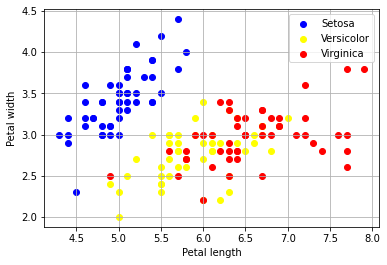

In [292]:

plt.scatter(class1[:,0],class1[:,1], color='blue')
plt.scatter(class2[:,0],class2[:,1], color='yellow')
plt.scatter(class3[:,0],class3[:,1], color='red')
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(["Setosa","Versicolor","Virginica"])
plt.grid()


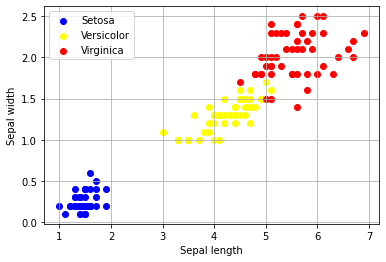

In [293]:
plt.scatter(class1[:,2],class1[:,3], color='blue')
plt.scatter(class2[:,2],class2[:,3], color='yellow')
plt.scatter(class3[:,2],class3[:,3], color='red')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend(["Setosa","Versicolor","Virginica"])
plt.grid()


In [294]:


target1 = np.array(([1],[0],[0]))
target2 = np.array(([0],[1],[0]))
target3 = np.array(([0],[0],[1]))
target = [target1, target2, target3]


In order to classify the data we need to define the sigmoid function:

In [295]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

The training is done by minimizing the mean square error of the classifier.  The MSE is given by:

$
MSE = \frac{1}{2}\sum_{k=1}^{N} (g_k - t_k)^T(g_k-t_k)
$

t_k is the true classification of each $x_k$ and $g_k = Wx_k$. W is a weighting matrix for the differnte values in the vector x. This the only tweakable parameter and thus, in order to minimize the MSE, we need to find the gradient of the MSE with respect to W and update W with a step size, $\alpha$ times the gradient. This is done many times iterativly.


Defining some parameters for the trainging of the classifier:

Defining the weighting matrix and the target data, $t_k$:

In [347]:
def trainingClassifier(numIterations, alpha, training):
    F = len(training[0][0]) # Number of features
    C = len(training)  # Number of classes
    N = len(training[0]) # Number of samples for each training set

    W = np.zeros((C, F))
    w_0 = np.zeros((C, 1))
    W = np.concatenate((W, w_0), axis=1)

    for _ in range(numIterations):
        W_prev = W
        grad_MSE = np.zeros((C,F+1))
        for k in range(len(training[0])):
                for x, tk in zip(training, target):
                        xk = np.append(x[k], 1)
                        xk = xk.reshape(F+1, 1)
                        gk = sigmoid(W@xk)
                        temp = np.multiply(gk-tk, gk)
                        temp = np.multiply(temp, (1-gk))
                        grad_MSE += temp@xk.T
                W = W_prev - alpha*grad_MSE
    return W

def confusionMatrix(W, samples, figureNum):
        C = len(testing)        
        confusion = np.zeros((C,C))
        for k in range(C):
                for x in samples[k]:
                        xk = np.append(x, 1)
                        gk = sigmoid(W@xk)
                        gk = gk.reshape(C, 1)
                        label = np.argmax(gk, axis=0)
                        confusion[k,label] += 1
        plt.figure(figureNum)
        sn.heatmap(confusion, annot = True)
        return confusion

[[  0.60192947   2.51318662  -3.68997443  -1.74777439   0.43315306]
 [  1.87692804  -4.44050286  -1.14438676   0.18544429   5.07448909]
 [ -7.45438397  -8.96385347  12.01673624  14.34813777 -10.49981108]]
The error rate for the training set is:  0.022222222222222254
The error rate for the testing set is:  0.033333333333333326


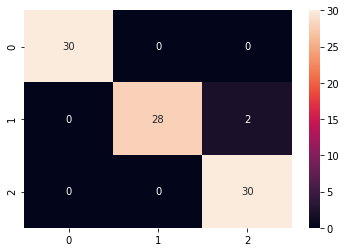

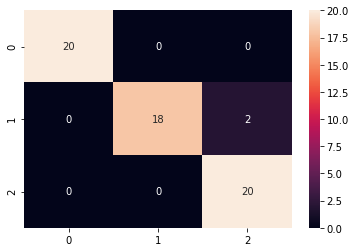

In [348]:
numIterations = 5000 # Number of iterations
alpha = 0.1 # Step length

training1 = class1[0:30]
training2 = class2[0:30]
training3 = class3[0:30]
training = [training1, training2, training3]

testing1 = class1[30:50]
testing2 = class2[30:50]
testing3 = class3[30:50]
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
confusionTesting = confusionMatrix(W, testing, 2)

errorRateTraining = 1-np.trace(confusionTraining)/(len(training[0])*len(training))
print("The error rate for the training set is: ", errorRateTraining)
errorRateTesting = 1-np.trace(confusionTesting)/(len(testing[0])*len(testing))
print("The error rate for the testing set is: ", errorRateTesting)


Switching to have 20 samples for training and 30 for testing. Otherwise using the same setup. 
-----------

[[ 0.48584849  1.68723424 -2.63769376 -1.21821253  0.30632317]
 [ 0.22976787 -2.23089568  1.52345403 -3.47162068  3.20367461]
 [-2.11591026 -2.88582259  3.49233553  4.25030942 -2.49111006]]
The error rate for the training set is:  0.05555555555555558
The error rate for the testing set is:  0.0


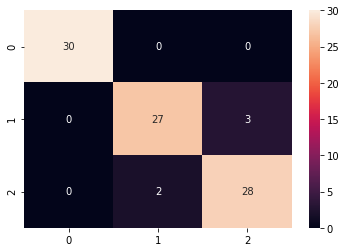

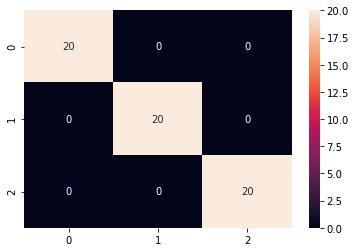

In [349]:
numIterations = 20000 # Number of iterations
alpha = 0.001 # Step length

training1 = class1[20:50]
training2 = class2[20:50]
training3 = class3[20:50]
training = [training1, training2, training3]

testing1 = class1[0:20]
testing2 = class2[0:20]
testing3 = class3[0:20]
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
confusionTesting = confusionMatrix(W, testing, 2)

errorRateTraining = 1-np.trace(confusionTraining)/(len(training[0])*len(training))
print("The error rate for the training set is: ", errorRateTraining)
errorRateTesting = 1-np.trace(confusionTesting)/(len(testing[0])*len(testing))
print("The error rate for the testing set is: ", errorRateTesting)


Produce histogram for each feature and class:
--------

No handles with labels found to put in legend.


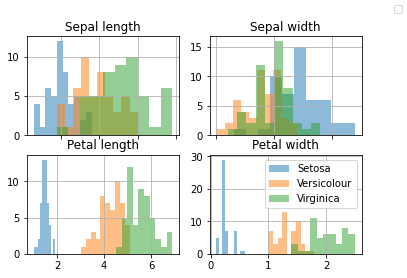

In [339]:
 def feature_name(f):
    if f == 0: return "Sepal length"
    if f == 1: return "Sepal width"
    if f == 2: return "Petal length"
    if f == 3: return "Petal width"

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.legend()

features = np.array([0,1,2,3])
ax1.hist(class1[:,0], alpha=0.5, label = "Setosa")
ax1.hist(class2[:,0], alpha=0.5, label = "Versicolour")
ax1.hist(class3[:,0], alpha=0.5, label = "Virginica")
ax1.set_title(feature_name(0))
ax1.set_xticklabels([])
ax1.grid()

features = np.array([0,1,2,3])
ax2.hist(class1[:,1], alpha=0.5, label = "Setosa")
ax2.hist(class2[:,1], alpha=0.5, label = "Versicolour")
ax2.hist(class3[:,1], alpha=0.5, label = "Virginica")
ax2.set_title(feature_name(1))
ax2.set_xticklabels([])
ax2.grid()

features = np.array([0,1,2,3])
ax3.hist(class1[:,2], alpha=0.5, label = "Setosa")
ax3.hist(class2[:,2], alpha=0.5, label = "Versicolour")
ax3.hist(class3[:,2], alpha=0.5, label = "Virginica")
ax3.set_title(feature_name(2))
ax3.grid()

ax4.hist(class1[:,3], alpha=0.5, label = "Setosa")
ax4.hist(class2[:,3], alpha=0.5, label = "Versicolour")
ax4.hist(class3[:,3], alpha=0.5, label = "Virginica")
ax4.set_title(feature_name(3))
ax4.legend()
ax4.grid()




Removing the feature with most overlap, feature two, sepal width. Training and testing with the remaining features:
-----------

[[  2.51371362  -4.74270629  -2.37139984   1.02537433]
 [ -0.93661109   1.81130742  -3.09549839   1.22361759]
 [ -6.8037524    9.09434951   8.21470743 -15.12098836]]
The error rate for the training set is:  0.022222222222222254
The error rate for the testing set is:  0.033333333333333326


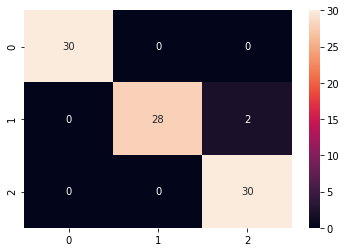

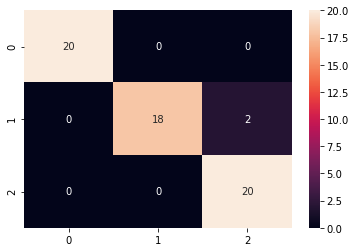

In [351]:
numIterations = 5000 # Number of iterations
alpha = 0.1 # Step length

training1 = np.delete(class1[0:30], 1, axis=1)
training2 = np.delete(class2[0:30], 1, axis=1)
training3 = np.delete(class3[0:30], 1, axis=1)
training = [training1, training2, training3]


testing1 = np.delete(class1[30:50], 1, axis=1)
testing2 = np.delete(class2[30:50], 1, axis=1)
testing3 = np.delete(class3[30:50], 1, axis=1)
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
confusionTesting = confusionMatrix(W, testing, 2)

errorRateTraining = 1-np.trace(confusionTraining)/(len(training[0])*len(training))
print("The error rate for the training set is: ", errorRateTraining)
errorRateTesting = 1-np.trace(confusionTesting)/(len(testing[0])*len(testing))
print("The error rate for the testing set is: ", errorRateTesting)

Now removing the feature with second most overlap:
---------------

[[ -2.74162716  -3.83880185   9.7384112 ]
 [  1.22988015  -2.49912151  -2.34705735]
 [  2.02309791   7.93408534 -23.06849103]]
The error rate for the training set is:  0.033333333333333326
The error rate for the testing set is:  0.050000000000000044


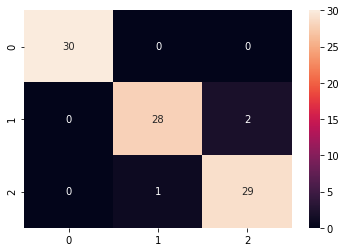

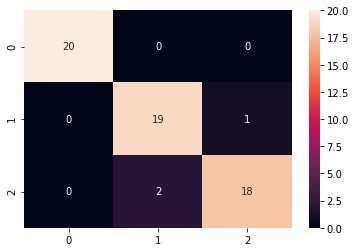

In [356]:
numIterations = 5000 # Number of iterations
alpha = 0.1 # Step length

training1 = np.delete(class1[0:30], [0,1], axis=1)
training2 = np.delete(class2[0:30], [0,1], axis=1)
training3 = np.delete(class3[0:30], [0,1], axis=1)
training = [training1, training2, training3]


testing1 = np.delete(class1[30:50], [0,1], axis=1)
testing2 = np.delete(class2[30:50], [0,1], axis=1)
testing3 = np.delete(class3[30:50], [0,1], axis=1)
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
confusionTesting = confusionMatrix(W, testing, 2)

errorRateTraining = 1-np.trace(confusionTraining)/(len(training[0])*len(training))
print("The error rate for the training set is: ", errorRateTraining)
errorRateTesting = 1-np.trace(confusionTesting)/(len(testing[0])*len(testing))
print("The error rate for the testing set is: ", errorRateTesting)

Lastly we try with only the feature with the least amount of overlap:
---------

[[ -2.83749201   7.44068585]
 [  0.18400979  -1.37114564]
 [  2.55458624 -12.52445615]]
The error rate for the training set is:  0.06666666666666665
The error rate for the testing set is:  0.01666666666666672


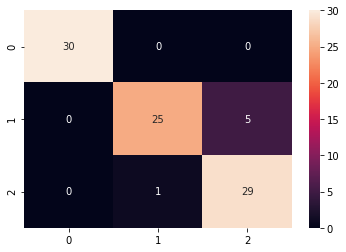

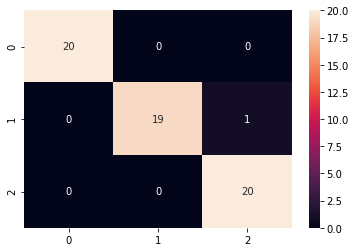

In [361]:
numIterations = 5000 # Number of iterations
alpha = 0.01 # Step length

training1 = np.delete(class1[0:30], [0,1,3], axis=1)
training2 = np.delete(class2[0:30], [0,1,3], axis=1)
training3 = np.delete(class3[0:30], [0,1,3], axis=1)
training = [training1, training2, training3]

testing1 = np.delete(class1[30:50], [0,1,3], axis=1)
testing2 = np.delete(class2[30:50], [0,1,3], axis=1)
testing3 = np.delete(class3[30:50], [0,1,3], axis=1)
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
confusionTesting = confusionMatrix(W, testing, 2)

errorRateTraining = 1-np.trace(confusionTraining)/(len(training[0])*len(training))
print("The error rate for the training set is: ", errorRateTraining)
errorRateTesting = 1-np.trace(confusionTesting)/(len(testing[0])*len(testing))
print("The error rate for the testing set is: ", errorRateTesting)